# Introduction

# Nama : Hilman Hibabullah
# Batch : FTDS 05

# Objektif pada Milestone ini adalah untuk membuat model neural network dari data Telco Customer Churn yang bersumber di https://www.kaggle.com/blastchar/telco-customer-churn , dimana dataset ini berisi tentang feature feature componen yang membuat apakah customer akan churn atau tidak

# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Packages for Feature Engineering and Preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Tensorflow
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Data Loading

In [2]:
# Loading data

df = pd.read_csv('12142021 MS1P2 WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max.columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Dalam dataset ini terdapat 7043 rows dengan 21 columns. Yang terdiri dari 20 features dan 1 kolom target

In [3]:
# Melihat info data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset terdiri dari banyak column object dan beberapa column int64 dan float64

Namun ada kejanggalan di column TotalCharges, column bertipe object seharusnya float64.

In [4]:
df_check = df[(df['TotalCharges'] == ' ')]
df_check

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Ternyata ada beberapa rows dalam column TotalCharges yang tidak ada isinya. mari kita hapus

In [5]:
# Menghapus rows pada columns TotalCharges yang tidak ada isinya

delete_rows_empty = df[df['TotalCharges'] == ' '].index
df = df.drop(delete_rows_empty, axis=0)

In [6]:
# Mengganti tipe column TotalCharges menjadi numerik

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# Eksplorasi Data & Cleaning Data

## Cleaning Data

In [8]:
# Cek Missing value

missing = pd.DataFrame(df.isnull().sum(), columns=['No. of missing values'])
missing['% missing_values'] = (missing/len(df)).round(2)*100
missing

,No. of missing values,% missing_values
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0
PhoneService,0,0.0
MultipleLines,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0


Tidak ada missing data

In [9]:
# cek data duplicate

print("duplicate data : ", df.duplicated().sum())

duplicate data :  0


Tidak ada duplicate data

## Eksplorasi Data

In [10]:
# Melihat unique value dalam kolom object

for col in df.select_dtypes(['object']).columns:
    print(col,":" ,(df[col].value_counts()))
    print("")

customerID : 3259-KNMRR    1
3441-CGZJH    1
7503-EPSZW    1
6549-YMFAW    1
4581-SSPWD    1
             ..
1867-BDVFH    1
7356-AYNJP    1
3401-URHDA    1
1384-RCUXW    1
5148-HKFIR    1
Name: customerID, Length: 7032, dtype: int64

gender : Male      3549
Female    3483
Name: gender, dtype: int64

Partner : No     3639
Yes    3393
Name: Partner, dtype: int64

Dependents : No     4933
Yes    2099
Name: Dependents, dtype: int64

PhoneService : Yes    6352
No      680
Name: PhoneService, dtype: int64

MultipleLines : No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

InternetService : Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

OnlineSecurity : No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

OnlineBackup : No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBack

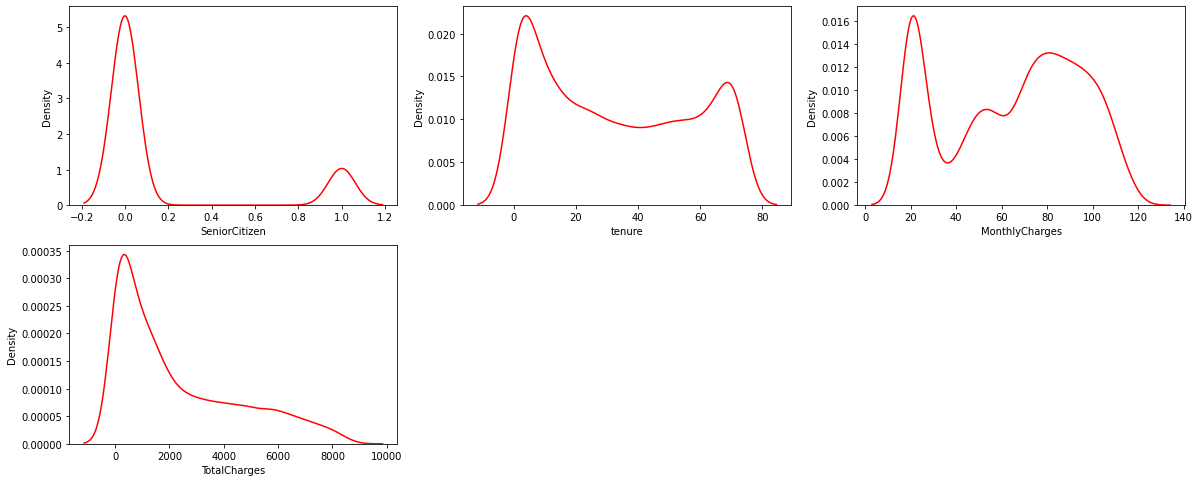

==========  Skewness  ==========

SeniorCitizen : 1.8311025436022044

tenure : 0.23773083190513133

MonthlyCharges : -0.22210292770166232

TotalCharges : 0.9616424997242504



In [11]:
# Distribusi Data

plt.figure(figsize=(20,30))
for i, col_num in enumerate(df.select_dtypes("number")):
    ax = plt.subplot(7, 3, i+1)
    sns.kdeplot(x=df[col_num], color="r")
plt.show()

# Melihat skew tiap distribusi
print('================================')
print('==========  Skewness  ==========')
print('')

for col in df.select_dtypes(['number']).columns:
    print(col,':' ,(df[col].skew()))
    print("")

Kolom yang mempunya nilai < -0,5 dan > 0,5 dalah kolom yang memiliki skewnes.

Dapat dilihat dari nilai skewness, columns tenure dan MonthlyCharges berdistribusi normal, sedangkan columns SeniorCitizen dan TotalCharges memiliki nilai skew

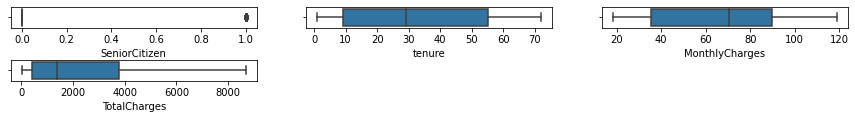

In [12]:
# Display numerical columns with boxplot to see the outlier

plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=1.5)
for i, col_num in enumerate(df.select_dtypes('number')):
    ax = plt.subplot(16,3,i+1)
    sns.boxplot(x=df[col_num])

Tidak ada outlier dalam dataset ini

## Visualisasi EDA dan EDA Analysis

In [13]:
df.sample(1
        )

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5857,0378-NHQXU,Female,0,Yes,Yes,17,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,No,Electronic check,88.25,1460.65,Yes


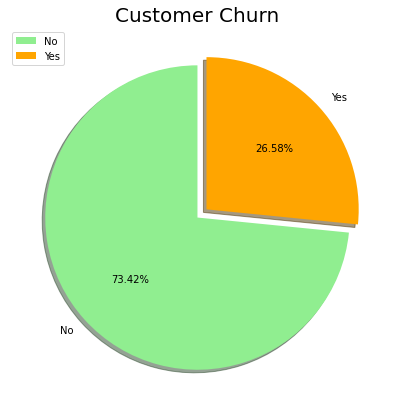

In [14]:
# Melihat komposisi target

labels = ['No', 'Yes']
size = df['Churn'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.08]

plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Customer Churn', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Dalam dataset ini bisa dilihat Churn untuk Customer yang no ada 73,42% atau sekitar 5163 customer, sedangkan customer yang churn atau tidak belangganan lagi ada sekitar 26.58% atau sekitar 1869 customer

Mari berfokus untuk melihat apa saja yang membuat customer untuk memutuskan tidak berlangganan lagi

In [15]:
df_churn = df[df['Churn'] == 'Yes']
df_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1699-HPSBG,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


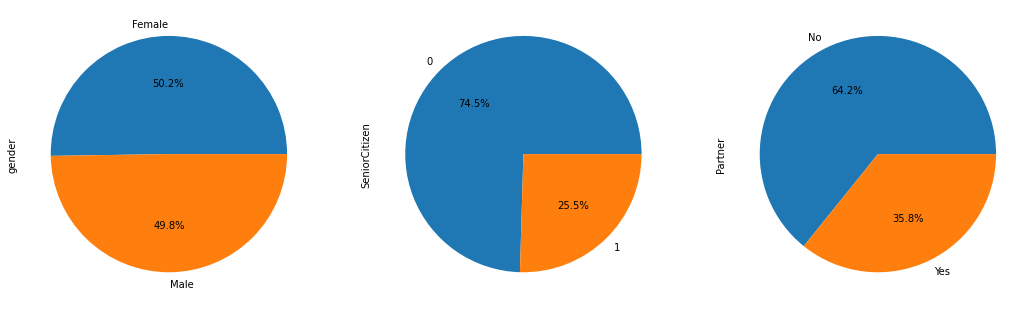

In [16]:
# Melihat composisi beberapa column yang menjadi pertimbangan custumoer untuk tidak berlangganan lagi
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,15))

df_churn['gender'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[0])
df_churn['SeniorCitizen'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[1])
df_churn['Partner'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[2])

plt.show()

Dalam Piechart diatas dapat dilihat jika;
1. Gender : baik male atau female tidak mempengaruhi apakah customer akan tidak berlangganan lagi, karena hampir sama banyak
2. SeniorCitizen : Untuk customer yang sudah berusia lanjut leibh banyak yang memutuskan untuk tidak berlangganan lagi
3. Partner : Customer yang mempunyai partner atau pasangan lebih banyak yang memutuskan untuk tidak berlangganan lagi, namun untuk yang tidak mempnyai pasanganpun masih ada yang memutuskan untuk tidak berlangganan lagi juga

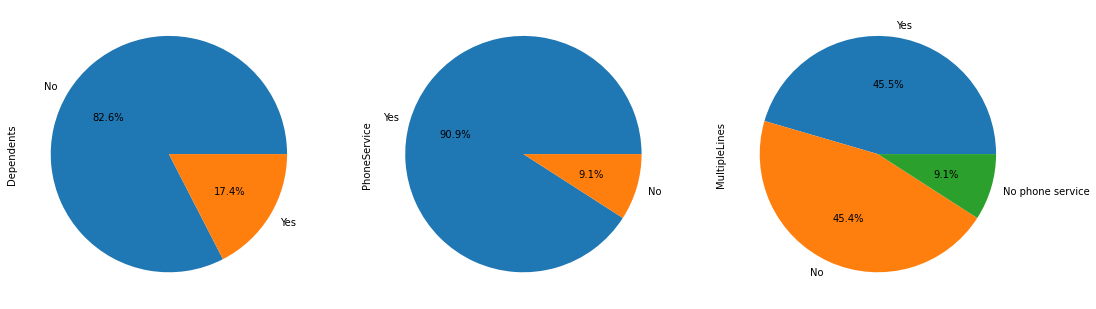

In [17]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,15))

df_churn['Dependents'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[0])
df_churn['PhoneService'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[1])
df_churn['MultipleLines'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[2])

plt.show()

Dalam Piechart diatas dapat dilihat jika:
1. Dependents : Customer yang tidak memiliki tanggunan justru lebih banyak yang memutuskan untuk tidak berlangganan
2. PhoneService : Custome yang memiliki Phone Service sangat banyak yang memutuskan untuk tidak berlangganan lagi, hal ini bisa mengidentifikasikan kalau layanan PhoneService ini kurang bagus atau bisa jadi banyak gangguan
3. MultipleLines : Dalam hal customer yang memiliki banyak saluran bisa dilihat jika yang memiliki banyak saluran, tidak memiliki banyak saluran, bahkan tidak ada layanan telfon tidak mempengaruhi apakah customer akan memutuskan untuk tidak berlangganan lagi.

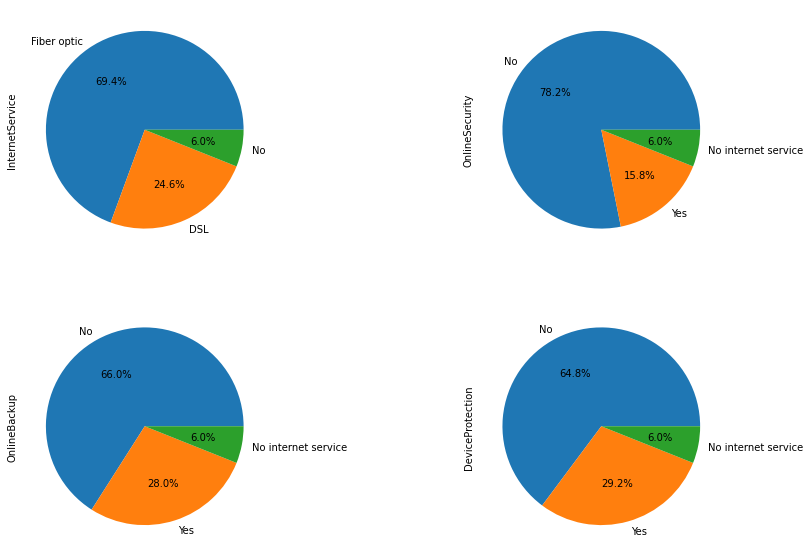

In [18]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15,10))

df_churn['InternetService'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[0,0])
df_churn['OnlineSecurity'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[0,1])
df_churn['OnlineBackup'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[1,0])
df_churn['DeviceProtection'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[1,1])

plt.show()

Dalam Piechart diatas dapat dilihat jika;
1. InternetService : Customer dengan layanan internet dengan fiber optic mendominasi untuk customer memutuskan agar tidak berlangganan lagi
2. OnlineSecurity : Customer yang tidak memiliki Online Security terlihat mendominasi customer yang memutusukan untuk tidak berlangganan lagi, bisa dikatakan jika OnlineSecurity sangat penting untuk keamanan dan kenyamanan customer
3. OnlineBackup : Customer yang tidak memiliki Online backup mendominasi untuk customer yang memutuskan tidak berlangganan lagi, maka mungkin Telco harus mengingatkan dan menawarkan onlinebackup untuk customer lebih sering lagi

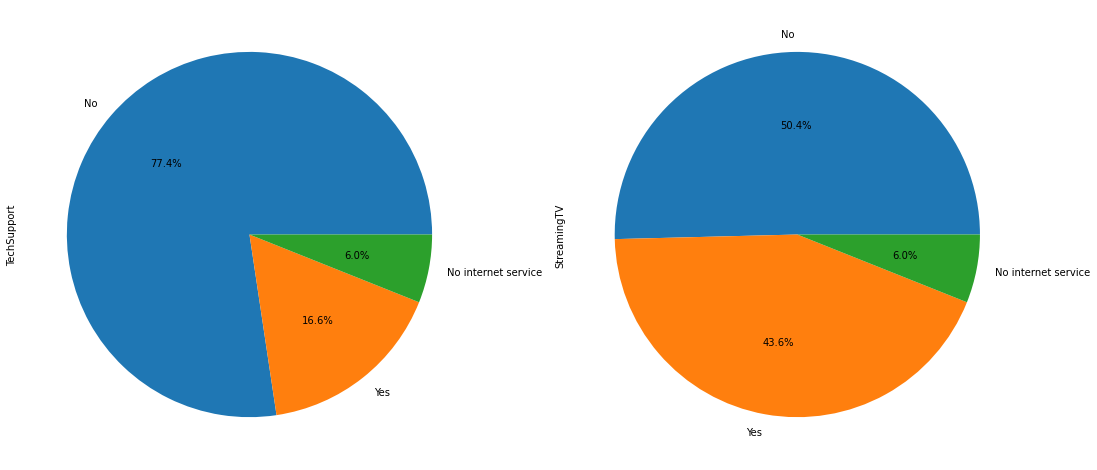

In [19]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(18,15))

df_churn['TechSupport'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[0])
df_churn['StreamingTV'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[1])

plt.show()

Dalam piechart diatas dapat dilihat jika:
1. TechSupport : Customer yang tidak memiliki TechSuport mendominasi untuk customer yang memutuskan tidak berlangganan lagi, berarti Telco harus meningkatkan TechSupport dan giat untuk menawarkan layanan TechSuport
2. StreamingTV : Layanan Streaming TV tidak begitu mempengaruhi customer untuk tidak berlangganan lagi, karena untuk customer yang berlangganan tv, atau tidak berlangganan, bahkan tidak ada internet service masih bisa membuat pelanggan untuk tidak berlangganan lagi

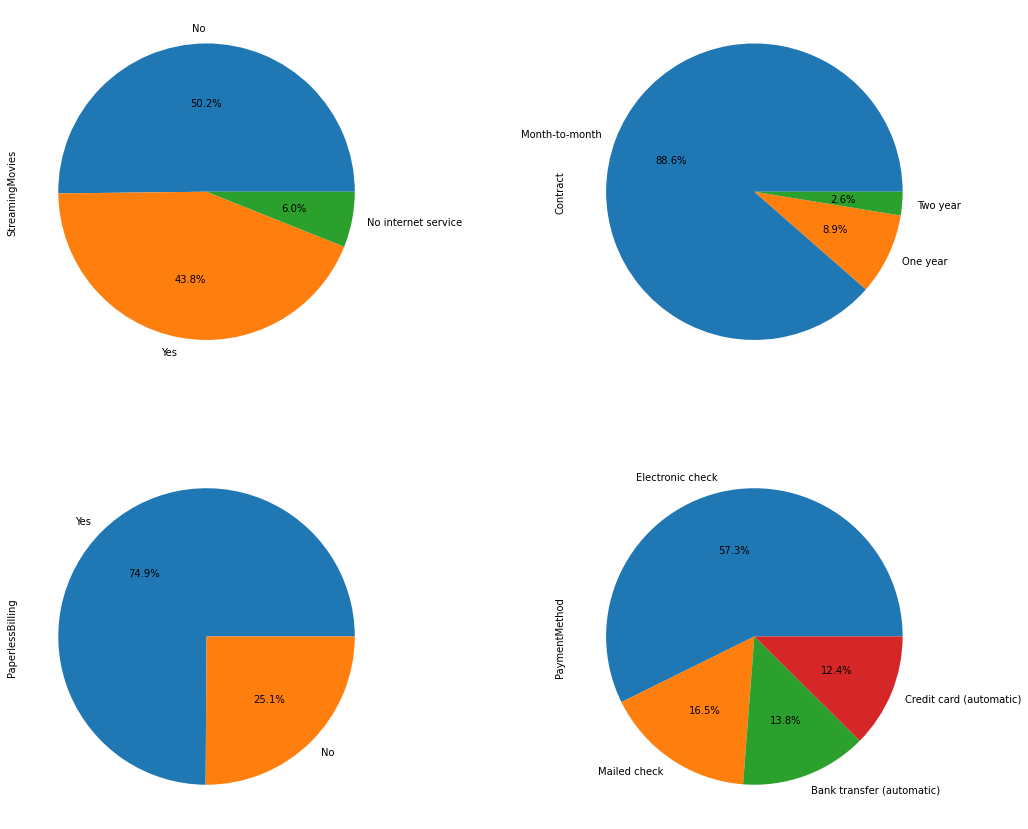

In [20]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(18,15))

df_churn['StreamingMovies'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[0,0])
df_churn['Contract'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[0,1])
df_churn['PaperlessBilling'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[1,0])
df_churn['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%', ax= axs[1,1])

plt.show()

Dalam piechart diatas dapat dilihat jika:
1. StreamingMovies : Seperti halnya layanan streamingTV, streaming movies pun tidak terlalu empengaruhi customer untuk tidak berlangganan lagi
2. Contract : Dapat dilihat dan disimpulkan untuk customer yang memiliki contract yang hanya month to month sangat mendominasi untuk customer tidak berlangganan lagi. Bisa disimpulkan bahwa customer yang memiliki contract month to month mungkin hanya mencoba coba Telco sehingga ada beberapa hal yang mungkin tidak sesuai ekspektasi customer dan membuat customer berhenti berlangganan

Untuk PaperBilling dan PaymentMethod tidak terlalu mempengaruhi customer untuk tidak berlangganan lagi, karena untuk paperbilling dan paymentmethod hanya sebagai pilihan untuk customer memilih agar lebih simple dalam hal pembayaran

Dalam semua piechart diatas, column column yang memiliki composisi yang mendominasi atau lebih banyak bisa diindikasikan menjadi penyebab untuk tidak berlangganan lagi

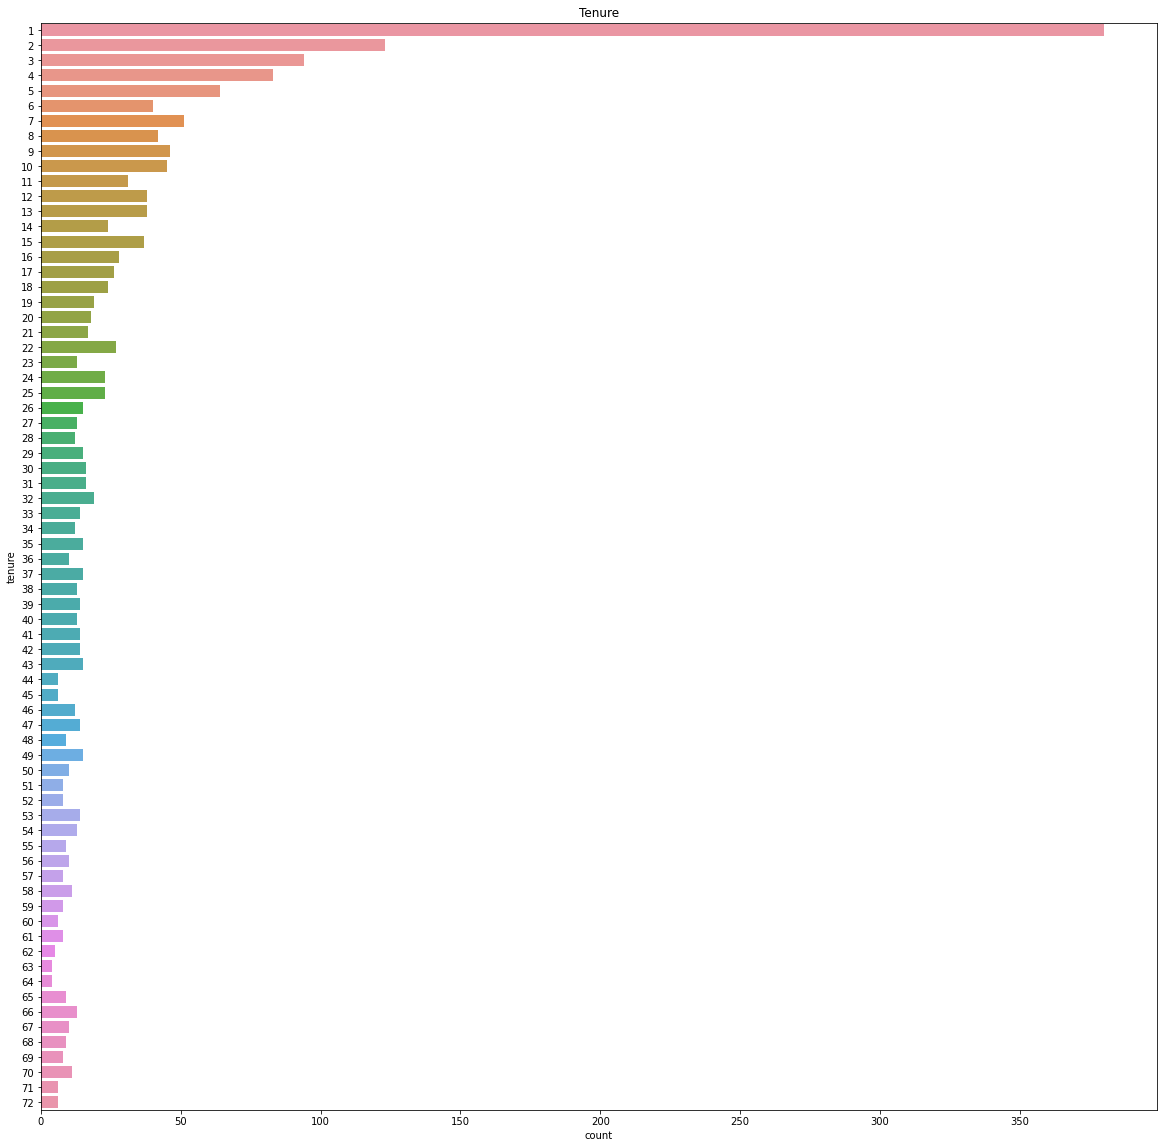

In [70]:
# Melihat tenure yang di ambil 

fig, ax = plt.subplots(figsize=(20,20))
sns.countplot(data=df_churn, y='tenure')
plt.title('Tenure')
plt.show()

Dapat dilihat jika customer yang memilih tenure yang sebentar 1-4 maka akan sangat banyak customer yang berhenti berlangganan

Dapat disimpulkan juga jika banyak customer yang hanya ingin coba coba oleh karena itu bisa sampai berhenti berlangganan

In [22]:
# Melihat Monthly Charges

fig = px.histogram(df, x='MonthlyCharges', color='Churn')
fig.show()

Dapat dilihat customer yang memiliki Monthly charges dari yang sedikit sampe yang bayak, masih juga ada customer yang memutuskan untuk berhenti berlangganan

In [23]:
# Melihat total charge

fig = px.histogram(df, x='TotalCharges', color='Churn')
fig.show()

Untuk Total Charges bisa dilihat jika semakin tinggi charges tidak juga bisa membuat pelanggan memutuskan untuk masih berlangganan atau tidak berlangganan lagi. karena seharusnya jika customer tau charges nya tinggi logikanya akan membuat berhenti berlangganan

Namun yang mempunya totalcharges sangat sedikit yaitu sekitar 0-200 adalah customer yang justru lebih banyak untuk berhenti berlangganan.

# Data Preprocessing

In [24]:
# Mengganti niali target menjadi 0 dan 1

df['Churn'] = df.Churn.replace({'No':0,'Yes':1})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


In [25]:
# Melihat korelasi tiap fitur

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.015683,0.219874,0.102411,0.150541
tenure,0.015683,1.000000,0.246862,0.825880,-0.354049
MonthlyCharges,0.219874,0.246862,1.000000,0.651065,0.192858
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484
Churn,0.150541,-0.354049,0.192858,-0.199484,1.000000


Dari korelasi bisa dilihat bahwa tenure dan totalchargers berkorelasi negatif, namun saya akan mempertahankan featture tersebut karena menurut saya masih penting untuk pertimbangan apakah customer akan berhenti berlangganan apa tidak

In [26]:
# Hapus column CustomerID karena tidak ada fungsi

df_final = df.drop(columns=['customerID'])
df_final

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


## Split Data

In [27]:
# Definisikan X dan y

x = df_final.drop(columns=['Churn'])
y = df_final['Churn']

In [28]:
#Define categorical columns di x_train

categorical = list(x.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

#Define numerical columns
numerical = list(x.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical columns are: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [29]:
# Definisikan label encoder

le = LabelEncoder()

In [30]:
# Encoder data categorical dalam x_train

for i in categorical:
  x[i] = le.fit_transform(x[i])

In [31]:
x.shape

(7032, 19)

In [32]:
# split data

from sklearn.model_selection import train_test_split
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [33]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.1, stratify=y_train_full)

In [34]:
x_train.shape

(5062, 19)

In [35]:
x_val.shape

(563, 19)

In [36]:
x_test.shape

(1407, 19)

In [37]:
tf.convert_to_tensor(x_train)

<tf.Tensor: shape=(5062, 19), dtype=float64, numpy=
array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.00000e+00,
        4.45500e+01, 2.20750e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.01500e+01, 4.05600e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.00000e+00,
        4.39000e+01, 2.78400e+02],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        6.52000e+01, 4.78445e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        7.58000e+01, 7.58000e+01],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.00000e+00,
        7.53500e+01, 7.53500e+01]])>

In [38]:
x_train.shape

(5062, 19)

## Input Pipeline

In [39]:
# pipeline

train = tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(5000).batch(16)
val = tf.data.Dataset.from_tensor_slices((x_val,y_val)).shuffle(500).batch(16)
test = tf.data.Dataset.from_tensor_slices((x_test,y_test)).shuffle(1000).batch(16)

# Define Model Tanpa Improvement

## Normalizer

In [40]:
 # scaling dengan tensor

normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(x_train)

## Sequential API

In [41]:
# Definisikan model Sequentional API

tf.keras.backend.clear_session()
model_seq = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(17, input_shape=(19,), activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(13, activation='relu'),
    tf.keras.layers.Dense(11, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'), 
    tf.keras.layers.Dense(1, activation ='sigmoid')
    ])

# compile model

model_seq.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Fit model

history = model_seq.fit(train, epochs=50, validation_data=val)

Epoch 1/50
317/317 [==============================] - 3s 5ms/step - loss: 0.4970 - accuracy: 0.7327 - val_loss: 0.4576 - val_accuracy: 0.7336
Epoch 2/50
317/317 [==============================] - 1s 2ms/step - loss: 0.4491 - accuracy: 0.7584 - val_loss: 0.4500 - val_accuracy: 0.7602
Epoch 3/50
317/317 [==============================] - 1s 2ms/step - loss: 0.4398 - accuracy: 0.7872 - val_loss: 0.4478 - val_accuracy: 0.7851
Epoch 4/50
317/317 [==============================] - 1s 2ms/step - loss: 0.4320 - accuracy: 0.7971 - val_loss: 0.4466 - val_accuracy: 0.7798
Epoch 5/50
317/317 [==============================] - 1s 2ms/step - loss: 0.4272 - accuracy: 0.7975 - val_loss: 0.4430 - val_accuracy: 0.7869
Epoch 6/50
317/317 [==============================] - 1s 2ms/step - loss: 0.4212 - accuracy: 0.8013 - val_loss: 0.4433 - val_accuracy: 0.7975
Epoch 7/50
317/317 [==============================] - 1s 2ms/step - loss: 0.4168 - accuracy: 0.8050 - val_loss: 0.4402 - val_accuracy: 0.7833
Epoch 

In [42]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 19)               39        
 n)                                                              
                                                                 
 dense (Dense)               (None, 17)                340       
                                                                 
 dense_1 (Dense)             (None, 15)                270       
                                                                 
 dense_2 (Dense)             (None, 13)                208       
                                                                 
 dense_3 (Dense)             (None, 11)                154       
                                                                 
 dense_4 (Dense)             (None, 5)                 60        
                                                        

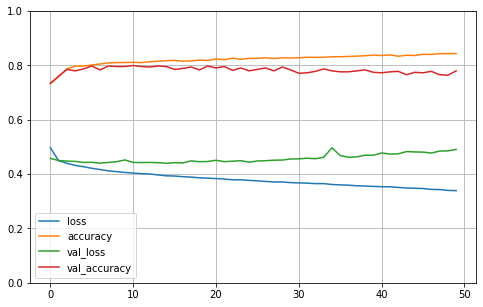

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

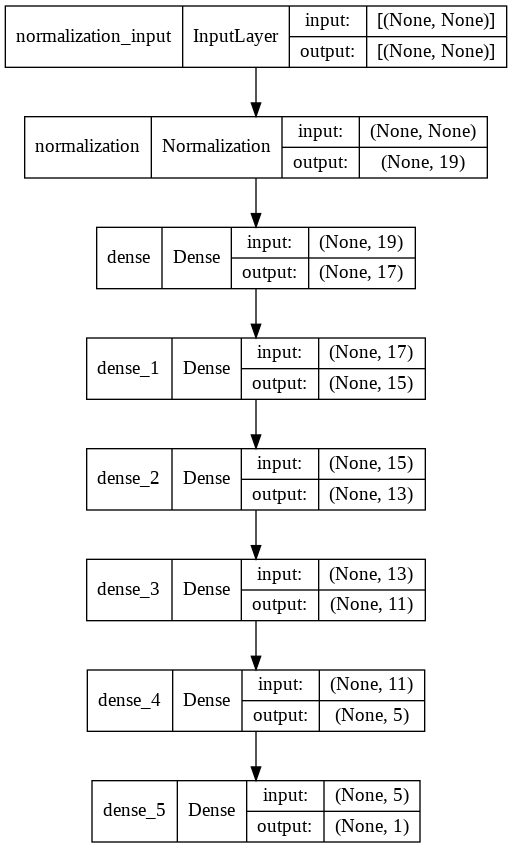

In [44]:
tf.keras.utils.plot_model(model_seq, show_shapes=True)

## Functional API

In [45]:
# Definisikan model Functional API

tf.keras.backend.clear_session()
input_data = tf.keras.layers.Input(shape=(19,))
x0 = normalizer(input_data)
x1 = tf.keras.layers.Dense(128, activation='relu')(x0)
x2 = tf.keras.layers.Dense(64, activation='relu')(x1)
x3 = tf.keras.layers.Dense(32, activation='relu')(x2)
x4 = tf.keras.layers.Dense(16, activation='relu')(x3)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x4)

model_func = tf.keras.models.Model(inputs=[input_data], outputs=[output])

model_func.compile( optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history_func = model_func.fit(train, epochs=50, validation_data=val)

Epoch 1/50
317/317 [==============================] - 2s 3ms/step - loss: 0.4594 - accuracy: 0.7732 - val_loss: 0.4259 - val_accuracy: 0.8011
Epoch 2/50
317/317 [==============================] - 1s 2ms/step - loss: 0.4135 - accuracy: 0.8098 - val_loss: 0.4258 - val_accuracy: 0.7975
Epoch 3/50
317/317 [==============================] - 1s 2ms/step - loss: 0.4048 - accuracy: 0.8094 - val_loss: 0.4201 - val_accuracy: 0.8099
Epoch 4/50
317/317 [==============================] - 1s 2ms/step - loss: 0.3987 - accuracy: 0.8167 - val_loss: 0.4492 - val_accuracy: 0.8011
Epoch 5/50
317/317 [==============================] - 1s 2ms/step - loss: 0.3926 - accuracy: 0.8157 - val_loss: 0.4198 - val_accuracy: 0.8028
Epoch 6/50
317/317 [==============================] - 1s 2ms/step - loss: 0.3855 - accuracy: 0.8234 - val_loss: 0.4484 - val_accuracy: 0.7886
Epoch 7/50
317/317 [==============================] - 1s 2ms/step - loss: 0.3796 - accuracy: 0.8291 - val_loss: 0.4332 - val_accuracy: 0.8011
Epoch 

In [46]:
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 normalization (Normalizatio  (None, 19)               39        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               2560      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                             

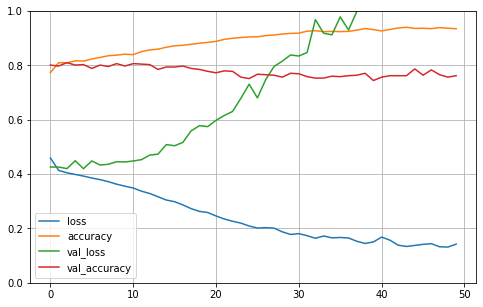

In [47]:
pd.DataFrame(history_func.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

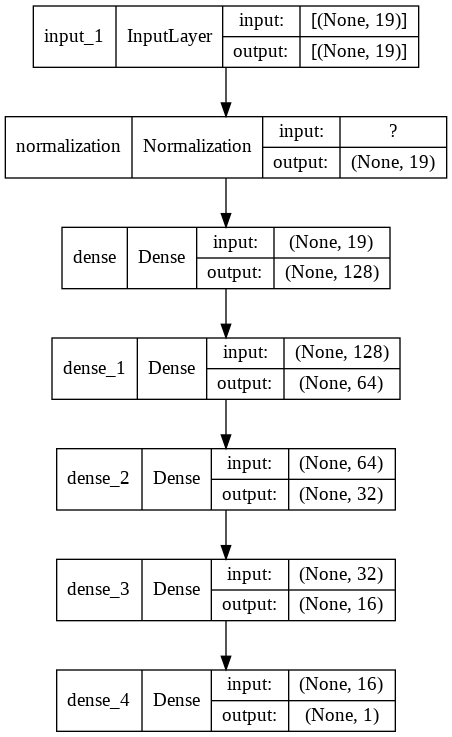

In [48]:
tf.keras.utils.plot_model(model_func, show_shapes=True)

# Model Improvement

## Sequential API Improvement Model

In [49]:
# Imporve model

tf.keras.backend.clear_session()
model_imp = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(17, input_shape=(19,), activation='relu'),

    tf.keras.layers.Dense(15),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(rate=0.2),

    tf.keras.layers.Dense(13),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(rate=0.2),

    tf.keras.layers.Dense(11),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(rate=0.2),

    tf.keras.layers.Dense(5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Dense(1, kernel_initializer="uniform",activation="sigmoid")
])

# Compile Model
model_imp.compile(optimizer ='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit model

history_imp = model_imp.fit(train, epochs=50, validation_data=val)

Epoch 1/50
317/317 [==============================] - 3s 4ms/step - loss: 0.6101 - accuracy: 0.7195 - val_loss: 0.5219 - val_accuracy: 0.7336
Epoch 2/50
317/317 [==============================] - 1s 3ms/step - loss: 0.5140 - accuracy: 0.7343 - val_loss: 0.4810 - val_accuracy: 0.7336
Epoch 3/50
317/317 [==============================] - 1s 3ms/step - loss: 0.4863 - accuracy: 0.7343 - val_loss: 0.4710 - val_accuracy: 0.7336
Epoch 4/50
317/317 [==============================] - 1s 3ms/step - loss: 0.4831 - accuracy: 0.7343 - val_loss: 0.4703 - val_accuracy: 0.7336
Epoch 5/50
317/317 [==============================] - 1s 4ms/step - loss: 0.4787 - accuracy: 0.7343 - val_loss: 0.4695 - val_accuracy: 0.7336
Epoch 6/50
317/317 [==============================] - 1s 4ms/step - loss: 0.4683 - accuracy: 0.7343 - val_loss: 0.4717 - val_accuracy: 0.7336
Epoch 7/50
317/317 [==============================] - 1s 3ms/step - loss: 0.4644 - accuracy: 0.7343 - val_loss: 0.4618 - val_accuracy: 0.7336
Epoch 

In [50]:
model_imp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 19)               39        
 n)                                                              
                                                                 
 dense (Dense)               (None, 17)                340       
                                                                 
 dense_1 (Dense)             (None, 15)                270       
                                                                 
 batch_normalization (BatchN  (None, 15)               60        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 15)                0         
                                                                 
 dropout (Dropout)           (None, 15)                0

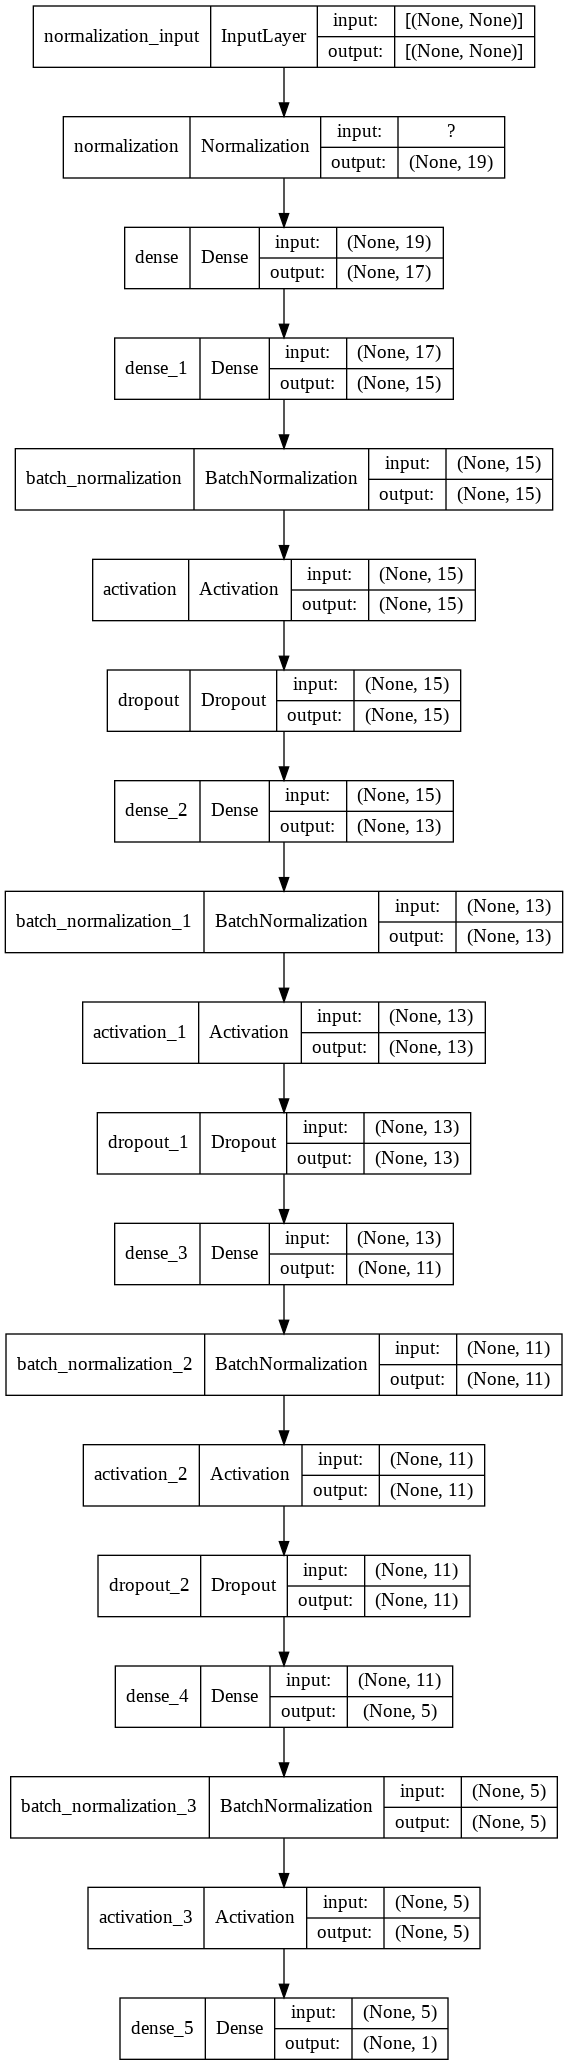

In [51]:
tf.keras.utils.plot_model(model_imp, show_shapes=True)

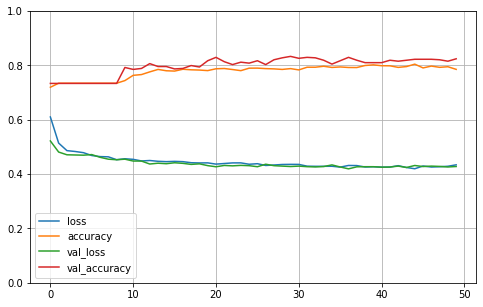

In [52]:
pd.DataFrame(history_imp.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [58]:
# save model

model_imp.save("my_keras_model.h5")

## Model Evaluation

### Accuracy dan Loss

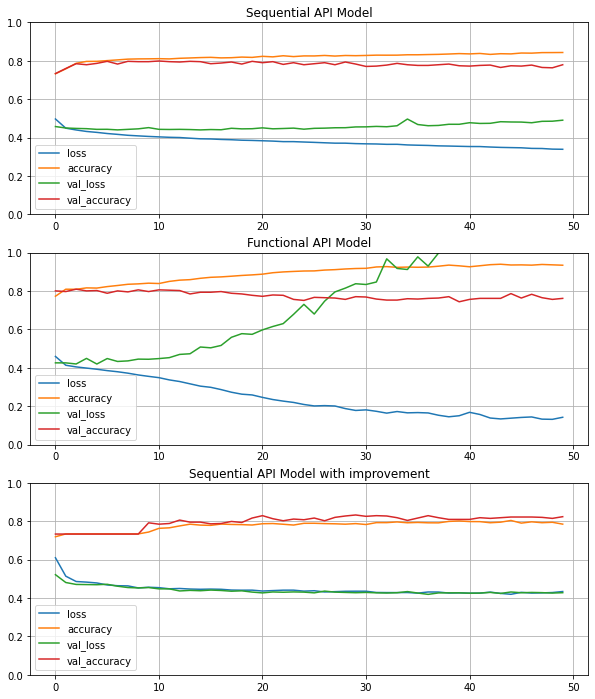

In [53]:
fig, ax = plt.subplots(nrows=3, figsize=(10, 12))
pd.DataFrame(history.history).plot(ax=ax[0])
pd.DataFrame(history_func.history).plot(ax=ax[1])
pd.DataFrame(history_imp.history).plot(ax=ax[2])

ax[0].grid(True)
ax[0].set_ylim(0, 1)
ax[0].set_title("Sequential API Model")
ax[1].grid(True)
ax[1].set_ylim(0, 1)
ax[1].set_title("Functional API Model")
ax[2].grid(True)
ax[2].set_ylim(0, 1)
ax[2].set_title("Sequential API Model with improvement")
plt.show()

Sequential API;

Sequential API Model mempunya hasil yang bisa terbilang overfit, karena accuracy training selalu naik sedangkan accuracy validation turun dan berbeda jauh. Untuk lossnya pun untuk validation loss semakin lama semakin naik sedangkan train loss semakin lama semakin turun

Functional API:

Sequential API Model mempunya hasil yang bisa terbilang sangat overfit, karena accuracy training selalu naik sedangkan accuracy validation turun dan berbeda jauh. Untuk lossnya pun untuk validation loss semakin lama semakin naik jauh bahkan sampai sedangkan train loss semakin lama semakin turun. Hal ini kemungkinan karena banyaknya jumlah neuron dalam hiden layer


Sequential API dengan improvement, ada beberapa layer tambahan dari Sequential API sebelumnya yaitu;

Setelah melakukan improvement dengan menambahkan batch normalitation dan juga dropout di hiden layer, bisa dilihat dalam train accuracy dan validation accuracy sudah bagus dan tidak overfit maupun undervit. Untuk train loss dan val loss juga menurun bersama dengan nilai yang hampir sama. Sequential Model dengan improvement adalah model yang paling bagus untuk data ini

### Sequintial Classification report

In [54]:
from sklearn.metrics import classification_report, roc_auc_score

# Sequential API
y_pred = model_seq.predict(test)

y_pred_threshold = []
for threshold in y_pred:
    if threshold > 0.5:
        y_pred_threshold.append(1)
    else:
        y_pred_threshold.append(0)

print(f'ROC AUC SCORE : {round((roc_auc_score(y_test,y_pred_threshold)),2)}\n')
print(classification_report(y_test,y_pred_threshold))

ROC AUC SCORE : 0.52

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1033
           1       0.30      0.28      0.29       374

    accuracy                           0.63      1407
   macro avg       0.52      0.52      0.52      1407
weighted avg       0.62      0.63      0.63      1407



In [55]:
from sklearn.metrics import classification_report

# Sequential API
y_pred_imp = model_imp.predict(test)

y_pred_imp_threshold = []
for threshold in y_pred_imp:
    if threshold > 0.5:
        y_pred_imp_threshold.append(1)
    else:
        y_pred_imp_threshold.append(0)

print(f'ROC AUC SCORE : {round((roc_auc_score(y_test,y_pred_imp_threshold)),2)}\n')
print(classification_report(y_test,y_pred_imp_threshold))

ROC AUC SCORE : 0.5

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1033
           1       0.27      0.26      0.26       374

    accuracy                           0.61      1407
   macro avg       0.50      0.50      0.50      1407
weighted avg       0.61      0.61      0.61      1407



# Model Inference

In [63]:
inference = x_test.sample(n=5, random_state=42)

In [65]:
inference

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1953,1,0,0,1,1,1,0,1,0,2,0,0,0,0,0,1,2,75.35,75.35
5876,0,1,0,0,1,1,0,1,0,2,0,0,0,2,0,1,2,86.00,86.00
6648,0,0,1,1,20,1,0,2,1,1,1,1,1,1,0,0,3,20.05,406.05
3351,0,0,0,0,16,1,0,0,0,2,0,2,0,0,0,1,3,53.90,834.15
6228,1,0,0,1,70,1,2,0,2,2,0,2,0,0,1,0,0,64.95,4551.50


In [68]:
# Predict new data

inf_pred = model_imp.predict(inference)
print(inf_pred)

[[0.6488661 ]
 [0.6488661 ]
 [0.12089393]
 [0.2701139 ]
 [0.0596225 ]]


hasil predict yang memiliki nilai di atas 0,5 adalah yang akan berhenti berlangganan, atau churn

# Model Analysis

Sequential API

1. Model ini mempunyai input dengan shape (19,), normalizer, 4 hiden layers dan 1 output
2. Jumlah neuron;
  - input layer = 17 neuron, dengan activation relu
  - hiden layer 1 = 15 neuron, dengan activation relu
  - hiden layer 2 = 13 neuron, dengan activation relu
  - hiden layer 3 = 11 neuron, dengan activation relu
  - hiden layer 4 = 5 neuron, dengan activation relu
  - output layer = 1 neuron, dengan activation sigmoid karena binary class
3. Model dicompile dengan optimizer = adam, loss= binary crossentropy, metrics = accuracy
4. Sequential API Model mempunya hasil yang bisa terbilang overfit, karena accuracy training selalu naik sedangkan accuracy validation turun dan berbeda jauh. Untuk lossnya pun untuk validation loss semakin lama semakin naik sedangkan train loss semakin lama semakin turun

Functional API

1. Model ini mempunyai input dengan shape (19,), 4 hiden layers dan 1 output
2. Jumlah neuron;
  - input layer = 17 neuron, shape (19,)
  - hiden layer 1 = 128 neuron, dengan activation relu
  - hiden layer 2 = 64 neuron, dengan activation relu
  - hiden layer 3 = 32 neuron, dengan activation relu
  - hiden layer 4 = 16 neuron, dengan activation relu
  - output layer = 1 neuron, dengan activation sigmoid karena binary class
3. Model dicompile dengan optimizer = adam, loss= binary crossentropy, metrics = accuracy
4. Sequential API Model mempunya hasil yang bisa terbilang sangat overfit, karena accuracy training selalu naik sedangkan accuracy validation turun dan berbeda jauh. Untuk lossnya pun untuk validation loss semakin lama semakin naik jauh bahkan sampai sedangkan train loss semakin lama semakin turun
5. Hal ini kemungkinan karena banyaknya jumlah neuron dalam hiden layer

Sequential API dengan improvement, ada beberapa layer tambahan dari Sequential API sebelumnya yaitu;

1. Model ini mempunyai input dengan shape (19,), 4 hiden layers dan 1 output
2. Jumlah neuron;
  - normalizer
  - input layer = 17 neuron danshape (19,)
  - hiden layer 1 = 15 neuron
  - batch normalitation
  - activation function relu
  - drop out 1
  - hiden layer 2 = 13 neuron
  - batch normalitation 1
  - activation relu
  - drop out 2
  - hiden layer 3 = 11 neuron
  - batch normalitation 1
  - activation relu
  - drop out 2
  - hiden layer 4 = 16 neuron
  - batch normalitation 1
  - activation relu
  - drop out 2
  - output layer = 1 neuron, dengan activation sigmoid karena binary class
3. Model dicompile dengan optimizer = adam, loss= binary crossentropy, metrics = accuracy
4. Setelah melakukan improvement dengan menambahkan batch normalitation dan juga dropout di hiden layer, bisa dilihat dalam train accuracy dan validation accuracy sudah bagus dan tidak overfit maupun undervit. Untuk train loss dan val loss juga menurun bersama dengan nilai yang hampir sama. 
5. Sequential Model dengan improvement adalah model yang paling bagus untuk data ini


Model dalam data ini yang paling bagus adalah Sequential API dengan improvement, dengan menambahkan batch normalitation dan beberapa drop out pada tiap hidden layer